## The Data

The first dataset is one from kaggle (https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset), comprised of recent real estate listings from across the United States.

In [ ]:
# !pip install geopy

In [ ]:
import pandas as pd
import missingno as msno
import geopy
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Jupyter
df = pd.read_csv("./datasets/realtor-data.csv")

# Google Colab
# df = pd.read_csv("/content/datasets/realtor-data.csv")

df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
df['sold_date'] = pd.to_datetime(df['sold_date'],
                                format = '%Y-%m-%d',
                                errors = 'coerce')

In [ ]:
filter_mask = [city == "Philadelphia"  or city == "New York" for city in df["city"]]

#date >= dt.strptime("2018-09-01", "%Y-%m-%d") for date in AAPL["Date"]

temp_df = df[filter_mask].copy()

In [ ]:
filter_mask2 = [date >= datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") for date in temp_df["sold_date"]]
df = temp_df[filter_mask2].copy()
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
465516,for_sale,810000.0,1.0,1.0,NaN,"304 E 65th St Apt 3C, New York, NY, 10065",304 E 65th St Apt 3C,New York,New York,10065.0,761.0,2020-08-18
465699,for_sale,4395000.0,3.0,3.0,NaN,"515 W 18th St Unit 715, New York, NY, 10011",515 W 18th St Unit 715,New York,New York,10011.0,1591.0,2021-05-06
465758,for_sale,1295000.0,2.0,2.0,NaN,"55 E 87th St Apt 14A, New York, NY, 10128",55 E 87th St Apt 14A,New York,New York,10128.0,NaN,2021-11-15
465786,for_sale,3875000.0,1.0,2.0,NaN,"157 W 57th St Apt 39D, New York, NY, 10019",157 W 57th St Apt 39D,New York,New York,10019.0,1021.0,2021-08-26
465825,for_sale,4800000.0,3.0,3.0,NaN,"515 W 29th St Apt 6N, New York, NY, 10001",515 W 29th St Apt 6N,New York,New York,10001.0,2133.0,2021-08-02


In [ ]:
df.shape

(3650, 12)

In [ ]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,3.650000e+03,3236.000000,3538.000000,1147.000000,3650.000000,2537.000000
mean,1.885981e+06,2.400185,2.007631,0.041465,13025.831507,1489.952700
std,4.743092e+06,1.214131,1.194275,0.159079,4262.165416,1009.446404
min,1.675000e+04,1.000000,1.000000,0.010000,10001.000000,343.000000
25%,3.750000e+05,1.000000,1.000000,0.020000,10014.000000,820.000000
50%,7.490000e+05,2.000000,2.000000,0.020000,10024.000000,1200.000000
75%,1.579000e+06,3.000000,3.000000,0.030000,19124.000000,1720.000000
max,3.500000e+07,10.000000,7.000000,3.000000,19154.000000,9675.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 465516 to 916016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   status        3650 non-null   object        
 1   price         3650 non-null   float64       
 2   bed           3236 non-null   float64       
 3   bath          3538 non-null   float64       
 4   acre_lot      1147 non-null   float64       
 5   full_address  3650 non-null   object        
 6   street        3649 non-null   object        
 7   city          3650 non-null   object        
 8   state         3650 non-null   object        
 9   zip_code      3650 non-null   float64       
 10  house_size    2537 non-null   float64       
 11  sold_date     3650 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 370.7+ KB


Data Features:
* status: object, Categorical
* price: float, Numerical - Continuous
* bed: float, Numerical - Discrete
* bath: float, Numerical - Discrete
* acre_lot: float, Numerical - Continuous
* full_address: object, 
* street: object
* city: object,
* state: object
* zip_code: float,
* house_size: float, Numerical - Continuous
* sold_date: object, 

In [ ]:
# Unique Values
for x in list(df.columns):
    print("For column", x,"the unique values are",
          df[x].nunique())

For column status the unique values are 1
For column price the unique values are 449
For column bed the unique values are 9
For column bath the unique values are 7
For column acre_lot the unique values are 20
For column full_address the unique values are 898
For column street the unique values are 897
For column city the unique values are 2
For column state the unique values are 2
For column zip_code the unique values are 91
For column house_size the unique values are 469
For column sold_date the unique values are 428


In [ ]:
# How many NaN's in each feature
df.isnull().sum()

status             0
price              0
bed              414
bath             112
acre_lot        2503
full_address       0
street             1
city               0
state              0
zip_code           0
house_size      1113
sold_date          0
dtype: int64

Text(0.5, 1.0, "Barplot of non-NaN's")

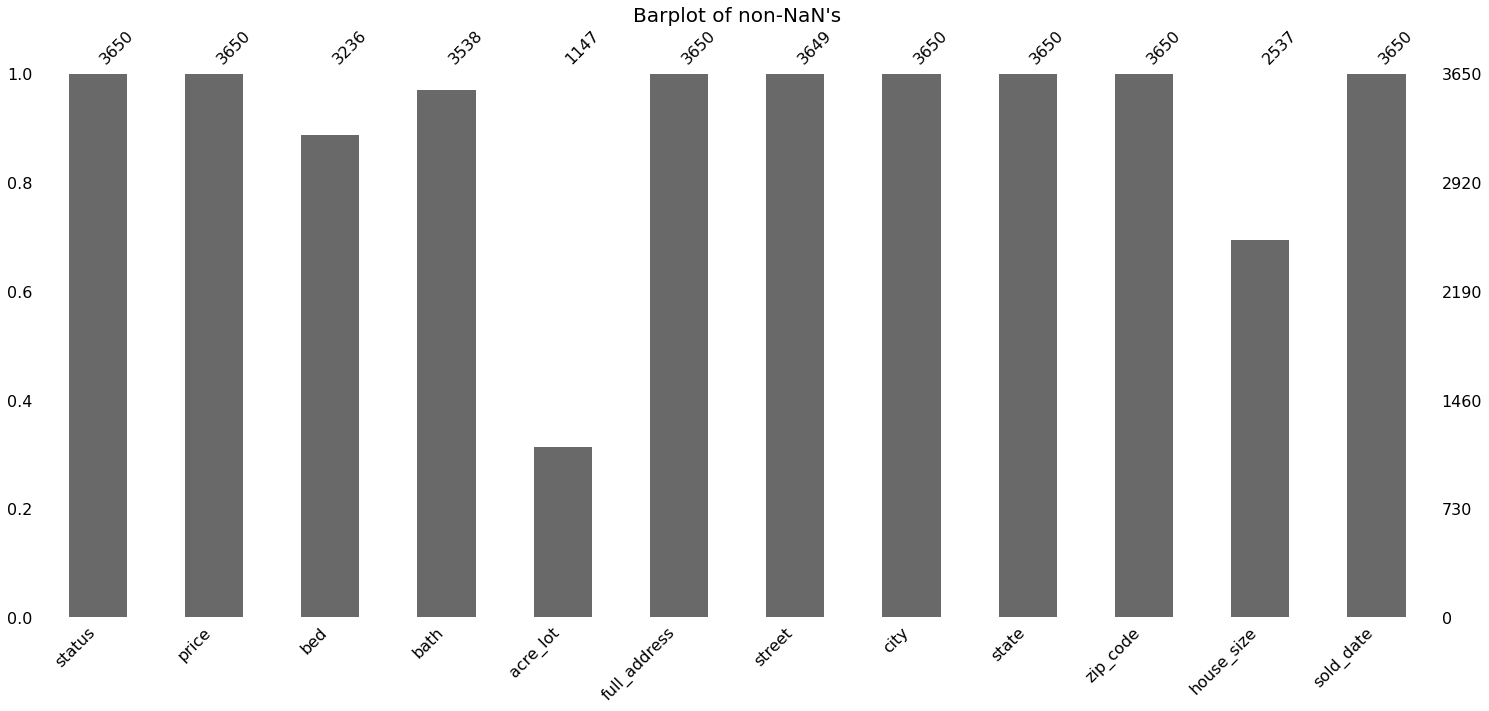

In [ ]:
# Bar plot of NaN's
plt.rc("axes", titlesize=20)
msno.bar(df)
plt.title("Barplot of non-NaN's")

<AxesSubplot:>

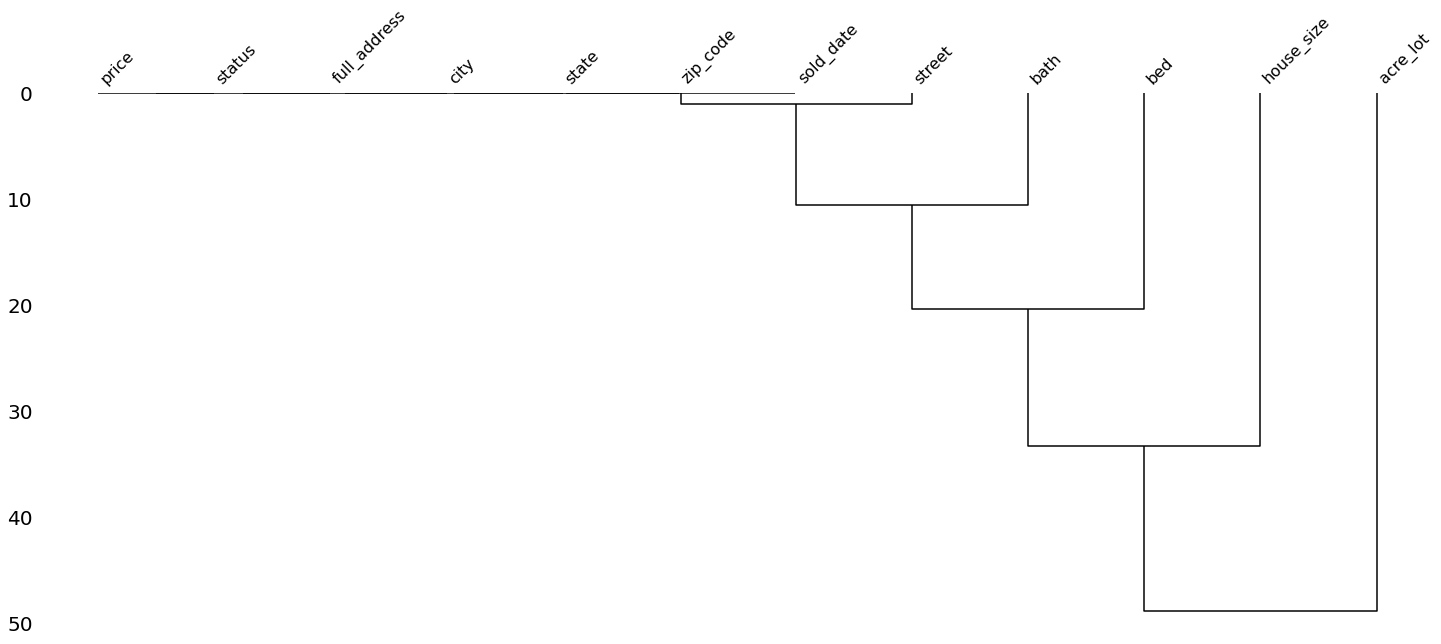

In [ ]:
msno.dendrogram(df)

In [ ]:
# Max Price
df['price'].max()

35000000.0

In [ ]:
# Min Price
df['price'].min()

16750.0

In [ ]:
# Price Range
df['price'].max() - df['price'].min()

34983250.0

In [ ]:
# Create categorical price
priceCat = []

for price in df['price']:
    if price < 10000:
        priceCat.append(0)
    elif price < 100000:
        priceCat.append(1)
    elif price < 1000000:
        priceCat.append(2)
    elif price < 10000000:
        priceCat.append(3)
    else:
        priceCat.append(4)
        
df['price_cat'] = priceCat

In [ ]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_cat
465516,for_sale,810000.0,1.0,1.0,NaN,"304 E 65th St Apt 3C, New York, NY, 10065",304 E 65th St Apt 3C,New York,New York,10065.0,761.0,2020-08-18,2
465699,for_sale,4395000.0,3.0,3.0,NaN,"515 W 18th St Unit 715, New York, NY, 10011",515 W 18th St Unit 715,New York,New York,10011.0,1591.0,2021-05-06,3
465758,for_sale,1295000.0,2.0,2.0,NaN,"55 E 87th St Apt 14A, New York, NY, 10128",55 E 87th St Apt 14A,New York,New York,10128.0,NaN,2021-11-15,3
465786,for_sale,3875000.0,1.0,2.0,NaN,"157 W 57th St Apt 39D, New York, NY, 10019",157 W 57th St Apt 39D,New York,New York,10019.0,1021.0,2021-08-26,3
465825,for_sale,4800000.0,3.0,3.0,NaN,"515 W 29th St Apt 6N, New York, NY, 10001",515 W 29th St Apt 6N,New York,New York,10001.0,2133.0,2021-08-02,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 465516 to 916016
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   status        3650 non-null   object        
 1   price         3650 non-null   float64       
 2   bed           3236 non-null   float64       
 3   bath          3538 non-null   float64       
 4   acre_lot      1147 non-null   float64       
 5   full_address  3650 non-null   object        
 6   street        3649 non-null   object        
 7   city          3650 non-null   object        
 8   state         3650 non-null   object        
 9   zip_code      3650 non-null   float64       
 10  house_size    2537 non-null   float64       
 11  sold_date     3650 non-null   datetime64[ns]
 12  price_cat     3650 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 399.2+ KB


In [ ]:
df.skew(axis = 0, skipna = True, numeric_only = True)

Some more data visualization and exploration was done on this dataset using non-Python software, such as Talbeau. Below are those visualizations

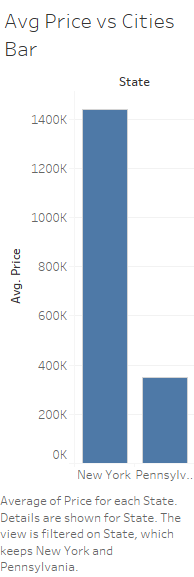

In [ ]:
from IPython.display import Image
Image(r".\images\Avg Price vs Cities Bar.png")

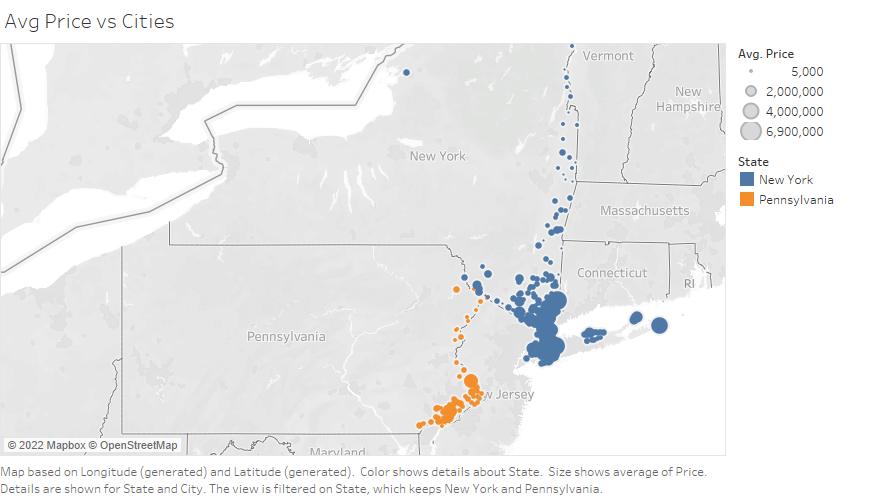

In [ ]:
Image(r".\images\Avg Price vs Cities Geo.png")

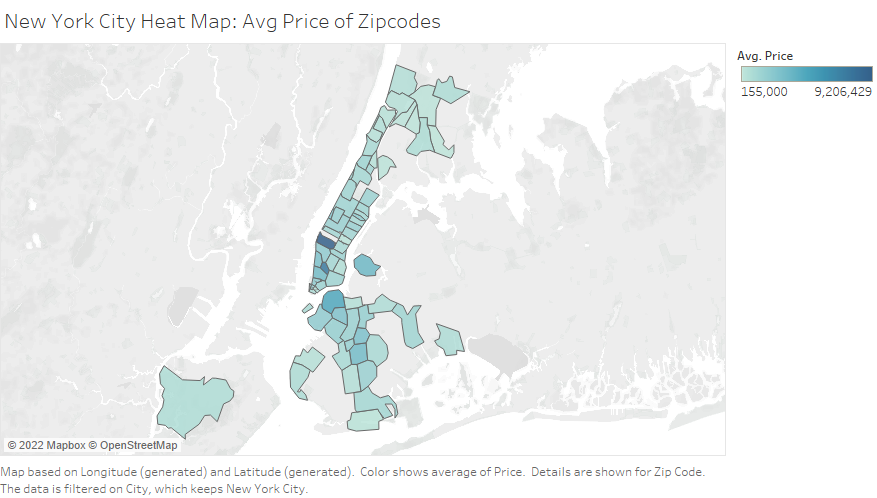

In [ ]:
Image(r".\images\New York City Heat Map.png")

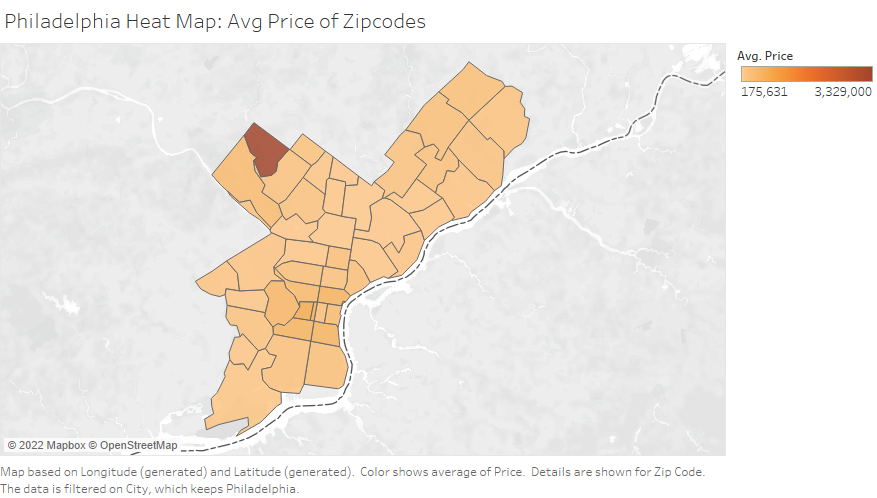

In [ ]:
Image(r".\images\Philadelphia Heat Map.png")

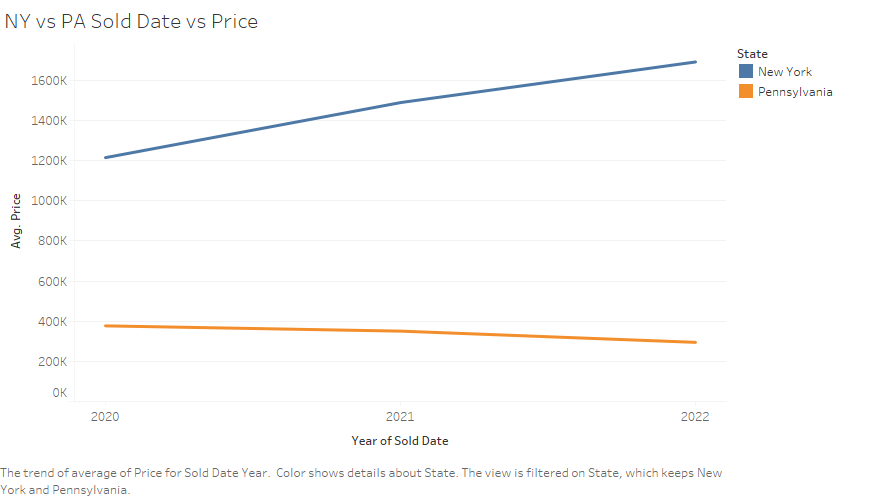

In [ ]:
Image(r".\images\NY vs PA Sold Date vs Price.png")

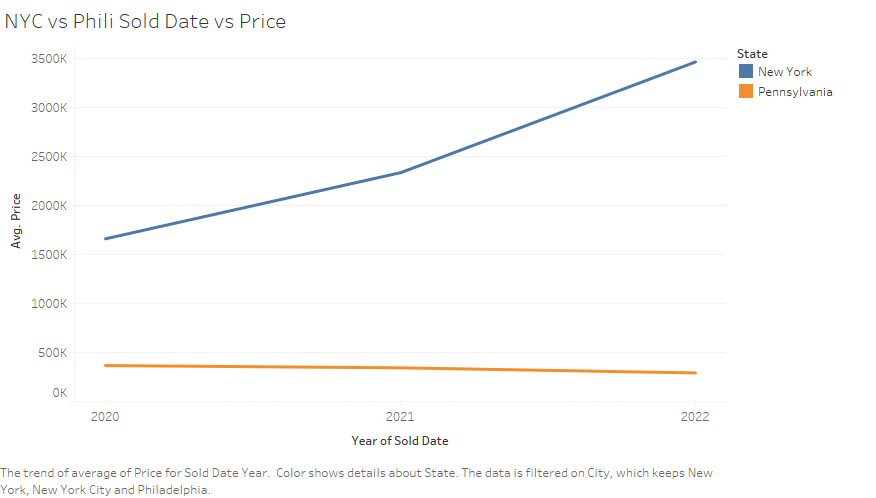

In [ ]:
Image(r".\images\NYC vs Phili Sold Date vs Price.png")

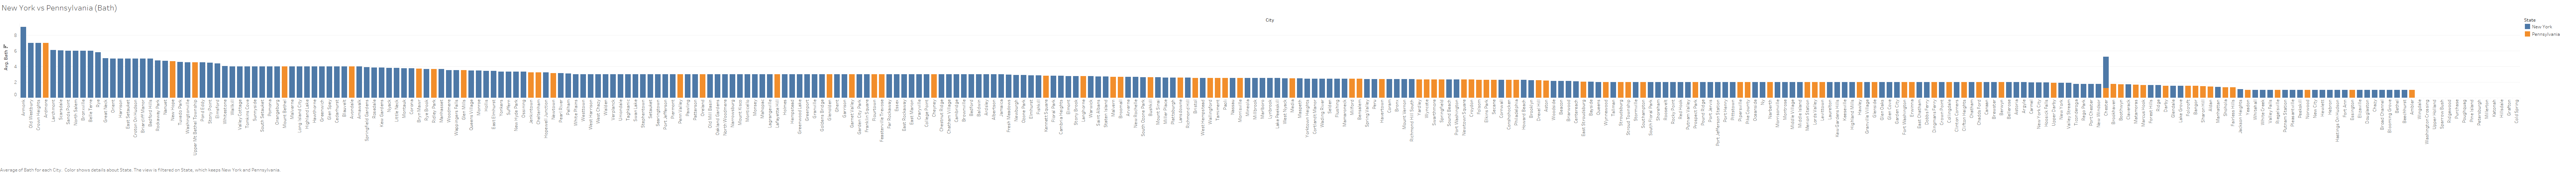

In [ ]:
Image(r".\images\NY vs PA Bar Bath.png")

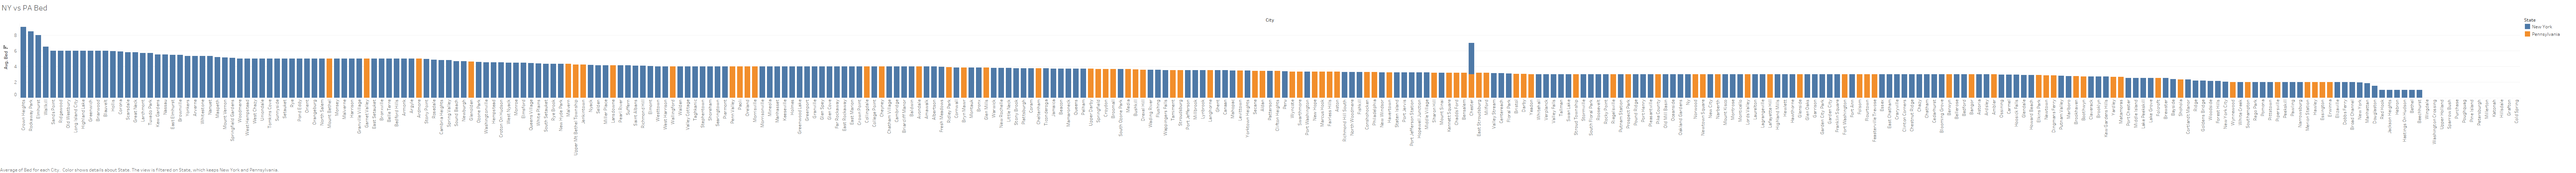

In [ ]:
Image(r".\images\NY vs PA Bar Bed.png")

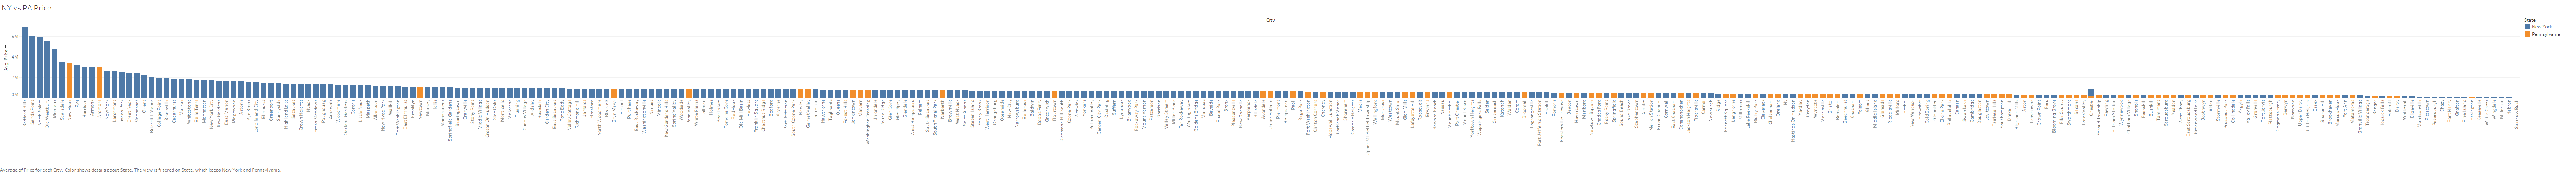

In [ ]:
Image(r".\images\NY vs PA Price Bar.png")

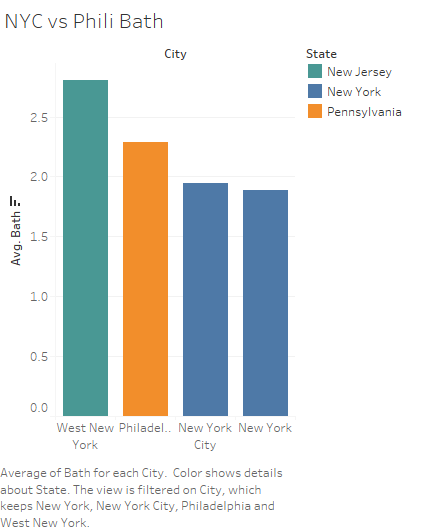

In [ ]:
Image(r".\images\NY Vs Phili Bar (Bath).png")

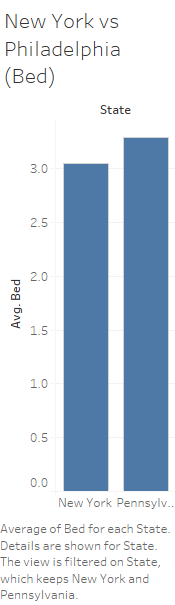

In [ ]:
Image(r".\images\NY Vs Phili Bar (Bed).png")

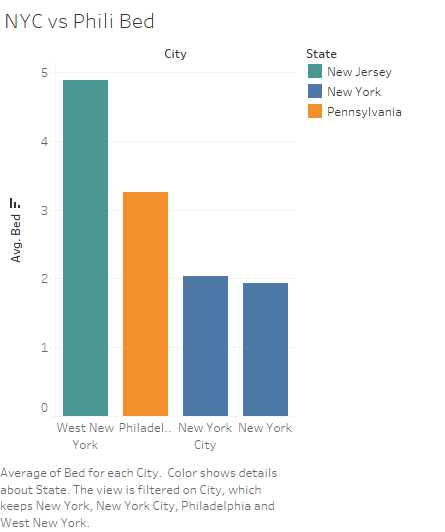

In [ ]:
Image(r".\images\NYC Vs Phili Bar (Bed).png")

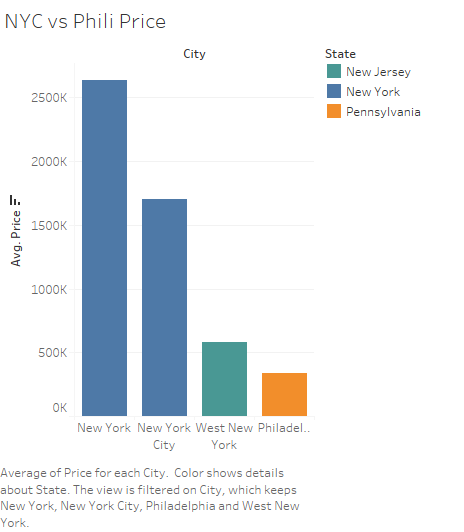

In [ ]:
Image(r".\images\NYC vs Phili Price Bar.png")

In [ ]:
# First we create a function to calculate all needed statistics for a feature and then return the dictionary
import scipy.stats

def get_statistics(df, feature):
    statistics = {}
    mean = np.mean(df[feature])
    stddev = np.std(df[feature])
    fifty_percentile = np.percentile(df[feature], 50)
    statistics['Mean'] = mean
    statistics['Standard Deviation'] = stddev
    statistics['50th Percentile'] = fifty_percentile
    return statistics

# Now we write a function that calculates the pearson correlation for two features
def pearson(df, feature1, feature2):
    x = df[feature1]
    y = df[feature2]
    return scipy.stats.pearsonr(x,y)
     

In [ ]:
# Gathering statistics for all the continuous values in our dataset
price_stats = get_statistics(df, 'price')
print("Price Statistics")
print(f'Mean: {price_stats["Mean"]:.2f}')
print(f'Standard Deviation: {price_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {price_stats["50th Percentile"]:.2f}')
print()

acre_stats = get_statistics(df, 'acre_lot')
print("Acre Lot Statistics")
print(f'Mean: {acre_stats["Mean"]:.2f}')
print(f'Standard Deviation: {acre_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {acre_stats["50th Percentile"]:.2f}')
print()

house_size_stats = get_statistics(df, 'house_size')
print("House Size Statistics")
print(f'Mean: {house_size_stats["Mean"]:2f}')
print(f'Standard Deviation: {house_size_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {house_size_stats["50th Percentile"]:.2f}')

Price Statistics
Mean: 1885981.03
Standard Deviation: 4742441.89
50th Percentile: 749000.00

Acre Lot Statistics
Mean: 0.04
Standard Deviation: 0.16
50th Percentile: nan

House Size Statistics
Mean: 1489.952700
Standard Deviation: 1009.25
50th Percentile: nan


### Processing

In [ ]:
# Drop acre_lot column
df.drop(['acre_lot', 'full_address', 'street'],
        axis=1, inplace=True)

In [ ]:
le = LabelEncoder()

cityLabel = le.fit_transform(df['city'])
stateLabel = le.fit_transform(df['state'])

In [ ]:
df['city'] = cityLabel
df['state'] = stateLabel

In [ ]:
df.head()

,status,price,bed,bath,city,state,zip_code,house_size,sold_date,price_cat
465516,for_sale,810000.0,1.0,1.0,0,0,10065.0,761.0,2020-08-18,2
465699,for_sale,4395000.0,3.0,3.0,0,0,10011.0,1591.0,2021-05-06,3
465758,for_sale,1295000.0,2.0,2.0,0,0,10128.0,NaN,2021-11-15,3
465786,for_sale,3875000.0,1.0,2.0,0,0,10019.0,1021.0,2021-08-26,3
465825,for_sale,4800000.0,3.0,3.0,0,0,10001.0,2133.0,2021-08-02,3


In [ ]:
# Drop null values
df = df.dropna()

In [ ]:
df.head()

,status,price,bed,bath,city,state,zip_code,house_size,sold_date,price_cat
465516,for_sale,810000.0,1.0,1.0,0,0,10065.0,761.0,2020-08-18,2
465699,for_sale,4395000.0,3.0,3.0,0,0,10011.0,1591.0,2021-05-06,3
465786,for_sale,3875000.0,1.0,2.0,0,0,10019.0,1021.0,2021-08-26,3
465825,for_sale,4800000.0,3.0,3.0,0,0,10001.0,2133.0,2021-08-02,3
465884,for_sale,1750000.0,2.0,3.0,0,0,10017.0,2200.0,2021-07-14,3


In [ ]:
df.sold_date.head()

465516   2020-08-18
465699   2021-05-06
465786   2021-08-26
465825   2021-08-02
465884   2021-07-14
Name: sold_date, dtype: datetime64[ns]

In [ ]:
df.sold_date.head()

465516   2020-08-18
465699   2021-05-06
465786   2021-08-26
465825   2021-08-02
465884   2021-07-14
Name: sold_date, dtype: datetime64[ns]

In [ ]:
def total_days(df):
    totalDays = []
    dayZero_String = "2020-01-01"
    dayZero_format = "%Y-%m-%d"
    dayZero = datetime.datetime.strptime(dayZero_String, dayZero_format)
    
    for el in df:
        timedelta = el - dayZero
        totalDays.append(timedelta.total_seconds() * 0.00001157)
        
    return(totalDays)

In [ ]:
temp = total_days(df['sold_date'])

In [ ]:
df['sold_date'] = temp

In [ ]:
df.head()

,status,price,bed,bath,city,state,zip_code,house_size,sold_date,price_cat
465516,for_sale,810000.0,1.0,1.0,0,0,10065.0,761.0,229.919040,2
465699,for_sale,4395000.0,3.0,3.0,0,0,10011.0,1591.0,490.827168,3
465786,for_sale,3875000.0,1.0,2.0,0,0,10019.0,1021.0,602.787744,3
465825,for_sale,4800000.0,3.0,3.0,0,0,10001.0,2133.0,578.796192,3
465884,for_sale,1750000.0,2.0,3.0,0,0,10017.0,2200.0,559.802880,3


### Correlation

In [ ]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
house_size    0.773612
price_cat     0.616338
bath          0.571950
bed           0.299525
sold_date     0.085744
zip_code     -0.311505
city         -0.311716
state        -0.311716
Name: price, dtype: float64

<AxesSubplot:>

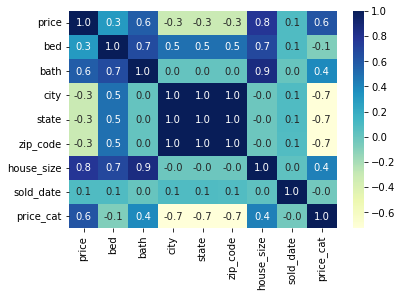

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".1f")

In [ ]:
for (columnName, columnData) in df.iteritems():
    corr, _ = pearsonr(df[columnName], df['price'])
    print('The Pearson Coefficient between ' + str(columnName) + ' and price is ' + str(corr))
    corr, _ = spearmanr(df[columnName], df['price'])
    print('The Spearman Coefficient between ' + str(columnName) + ' and price is ' + str(corr))
    print()

The Pearson Coefficient between status and price is nan
The Spearman Coefficient between status and price is nan

The Pearson Coefficient between price and price is 1.0
The Spearman Coefficient between price and price is 0.9999999999999998

The Pearson Coefficient between bed and price is 0.29952519256850885
The Spearman Coefficient between bed and price is -0.18852312032219556

The Pearson Coefficient between bath and price is 0.5719496083649271
The Spearman Coefficient between bath and price is 0.3380545400248489

The Pearson Coefficient between city and price is -0.311715868375819
The Spearman Coefficient between city and price is -0.8380704561959639

The Pearson Coefficient between state and price is -0.311715868375819
The Spearman Coefficient between state and price is -0.8380704561959639

The Pearson Coefficient between zip_code and price is -0.3115050649835457
The Spearman Coefficient between zip_code and price is -0.7376417265236512

The Pearson Coefficient between house_size a

C:\Users\ukkal\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\ukkal\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


### Feature Selection

In [ ]:
df.drop(['status','city', 'state'],
        axis=1, inplace=True)

In [ ]:
reg_df = df.drop(['price_cat'], axis=1)

In [ ]:
cat_df = df.drop(['price'],
        axis=1)

### Stratifying and Splitting Data into Train and Test Data

In [ ]:
# For regression models
reg_df.head()

,price,bed,bath,zip_code,house_size,sold_date
465516,810000.0,1.0,1.0,10065.0,761.0,229.919040
465699,4395000.0,3.0,3.0,10011.0,1591.0,490.827168
465786,3875000.0,1.0,2.0,10019.0,1021.0,602.787744
465825,4800000.0,3.0,3.0,10001.0,2133.0,578.796192
465884,1750000.0,2.0,3.0,10017.0,2200.0,559.802880


In [ ]:
# For categorical models
cat_df.head()

,bed,bath,zip_code,house_size,sold_date,price_cat
465516,1.0,1.0,10065.0,761.0,229.919040,2
465699,3.0,3.0,10011.0,1591.0,490.827168,3
465786,1.0,2.0,10019.0,1021.0,602.787744,3
465825,3.0,3.0,10001.0,2133.0,578.796192,3
465884,2.0,3.0,10017.0,2200.0,559.802880,3


In [ ]:
reg_df.shape

(2327, 6)

In [ ]:
cat_df.shape

(2327, 6)

In [ ]:
# for regression models
regx_train, regx_test, regy_train, regy_test = train_test_split(reg_df.drop('price', axis=1), 
                                                    reg_df['price'], test_size=0.33)
print(regx_train.shape, regx_test.shape)
print(regy_train.shape, regy_test.shape)

(1559, 5) (768, 5)
(1559,) (768,)


In [ ]:
# for categorical models 
catx_train, catx_test, caty_train, caty_test = train_test_split(cat_df.drop('price_cat', axis=1), 
                                                    cat_df['price_cat'], test_size=0.33)
print(catx_train.shape, catx_test.shape)
print(caty_train.shape, caty_test.shape)

(1559, 5) (768, 5)
(1559,) (768,)


### Feature Scaling

In [ ]:
scaler = StandardScaler()
regx_train = scaler.fit_transform(regx_train)
catx_train = scaler.fit_transform(catx_train)

regx_test = scaler.transform(regx_test)
catx_test = scaler.transform(catx_test)

## Machine Learning Algorithms

### Logistic Regression

In [ ]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, f_classif, chi2
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(max_iter=150)
lr_model.fit(catx_train, caty_train)
lry_pred = lr_model.predict(catx_test)

In [ ]:
lr_accuracy = accuracy_score(lry_pred, caty_test)
print("Logistic regression accuracy: {}".format(lr_accuracy))

Logistic regression accuracy: 0.8567708333333334


#### Confusion Matrix

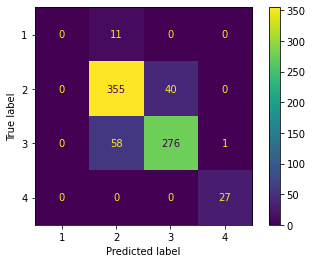

In [ ]:
lr_cm = confusion_matrix(caty_test, lry_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linr_model = LinearRegression()
linr_model.fit(regx_train, regy_train)
print(linr_model.score(regx_test, regy_test))

0.7013700562457841


In [ ]:
regx_test.shape

(768, 5)

In [ ]:
regy_test.shape

(768,)

In [ ]:
linry_pred = linr_model.predict(regx_test)

linr_diff = pd.DataFrame({'Actual value': regy_test,
                         'Predicted value': linry_pred})
linr_diff.head()

,Actual value,Predicted value
658405,349900.0,-3.014239e+06
659245,339700.0,-1.743400e+05
643903,219000.0,1.571129e+05
787271,2215000.0,1.653549e+06
640367,399000.0,-6.642176e+05


In [ ]:
linr_meanAbErr = mean_absolute_error(regy_test, linry_pred)
linr_meanSqErr = mean_squared_error(regy_test, linry_pred)
linr_rootMeanSqErr = np.sqrt(linr_meanSqErr)

print('Mean Absolute Error:', linr_meanAbErr)
print('Mean Square Error:', linr_meanSqErr)
print('Root Mean Square Error:', linr_rootMeanSqErr)

Mean Absolute Error: 2055745.820366648
Mean Square Error: 10716516168440.6
Root Mean Square Error: 3273609.0433099368


In [ ]:
priceRange = df['price'].max() - df['price'].min()

print('Normalized Mean Absolute Error:', linr_meanAbErr/priceRange)
print('Normalized Mean Square Error:', linr_meanSqErr/priceRange)
print('Normalized Root Mean Square Error:', linr_rootMeanSqErr/priceRange)

Normalized Mean Absolute Error: 0.058785814749361544
Normalized Mean Square Error: 306447.97036441416
Normalized Root Mean Square Error: 0.09361165805387851


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(catx_train, caty_train)
dtcy_pred = dtc_model.predict(catx_test)

In [ ]:
dtc_accuracy = accuracy_score(dtcy_pred, caty_test)
print("Decision tree classification accuracy: {}".format(dtc_accuracy))

Decision tree classification accuracy: 0.9752604166666666


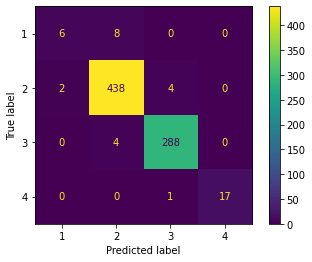

In [ ]:
dtc_cm = confusion_matrix(caty_test, dtcy_pred, labels=dtc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=dtc_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [ ]:
cat_df.head()

,bed,bath,zip_code,house_size,sold_date,price_cat
465516,1.0,1.0,10065.0,761.0,229.919040,2
465699,3.0,3.0,10011.0,1591.0,490.827168,3
465786,1.0,2.0,10019.0,1021.0,602.787744,3
465825,3.0,3.0,10001.0,2133.0,578.796192,3
465884,2.0,3.0,10017.0,2200.0,559.802880,3


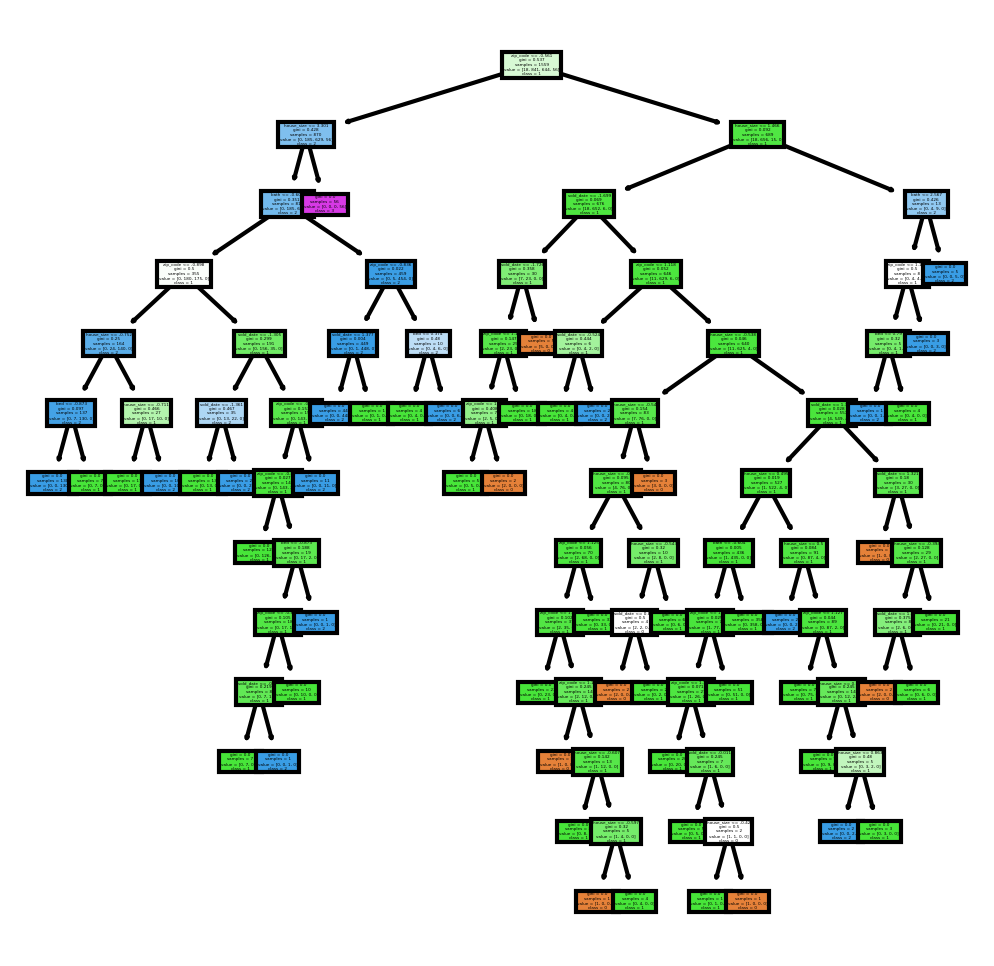

In [ ]:
from sklearn import tree

fn = ['bed', 'bath', 'zip_code', 'house_size', 'sold_date']
cn = ['0', '1', '2', '3', '4']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtc_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(regx_train, regy_train)
dtry_pred = dtr_model.predict(regx_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(regy_test, dtry_pred)

0.6018102075275927

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(regx_train, regy_train)

[23:15:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [ ]:
# Make predictionss
y_pred = xg_reg.predict(regx_test)

In [ ]:
xgb_meanAbErr = mean_absolute_error(regy_test, y_pred)
xgb_meanSqErr = mean_squared_error(regy_test, y_pred)
xgb_rootMeanSqErr = np.sqrt(xgb_meanSqErr)

print('Mean Absolute Error:', xgb_meanAbErr/priceRange)
print('Mean Square Error:', xgb_meanSqErr/priceRange)
print('Root Mean Square Error:', xgb_rootMeanSqErr/priceRange)

Mean Absolute Error: 0.062053631794833745
Mean Square Error: 421890.41183565033
Root Mean Square Error: 0.10983768998560393


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(catx_train, caty_train)
rfy_pred = rf_model.predict(catx_test)

In [ ]:
rf_accuracy = accuracy_score(rfy_pred, caty_test)
print("Random Forrest accuracy: {}".format(rf_accuracy))

Random Forrest accuracy: 0.98046875


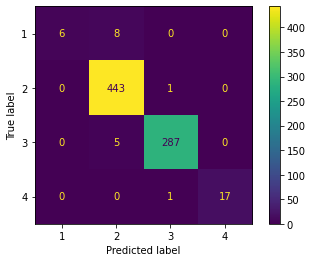

In [ ]:
# Confusion Matrix

rf_cm = confusion_matrix(caty_test, rfy_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
disp.plot()
plt.grid(False)
plt.show()